In [2]:
import pandas as pd
import numpy as np

## Simplistic Linear Regression Model

In [3]:
xi = [453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]

def linear_regression(xi):
    n = len(xi)
    
    pred = w0
    
    for j in range(n):
        pred += w[j] * xi[j]
        
    return pred

linear_regression(xi)

12.312

In [4]:
np.exp(linear_regression(xi))

222348.2221101062

In [5]:
np.log1p(222348.2221101062)

12.312004497439833

## Linear Regression in Vector Form

In [6]:
def dot(xi, w):
    n = len(xi)

    res = 0.0

    for j in range(n):
        res +=  w[j] * xi[j]
    
    return res

In [7]:
def linear_regression(xi):
    return w0 + dot(xi, w)

In [8]:
w_new = [w0] + w # adds bias to the beginning of the list of weights
w_new

[7.17, 0.01, 0.04, 0.002]

In [9]:
def linear_regression(xi):
    xi = [1] + xi
    return np.dot(xi, w_new)

linear_regression(xi)

12.312000000000001

In [10]:
xi = [453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

x1  = [1, 148, 24, 1385]
x2  = [1, 132, 25, 2031]
x10 = [1, 4533, 22, 86]

X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1, 4533,   22,   86]])

In [11]:
X.dot(w_new)

array([12.38 , 13.552, 53.552])

## Training a Linear Regression Model

In [12]:
X  = [
    [148, 24, 1385],
    [132, 25, 2031],
    [4533, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86]
]

X = np.array(X)

y = [100, 200, 150, 250, 100, 200, 150, 250, 120]

In [13]:
def train_linear_regression(X, y):
    # Add bias terms
    ones = np.ones(X.shape[0])

    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)

    XTY = X.T.dot(y)
    w_full = XTX_inv.dot(XTY)

    w0 = w_full[0] # bias term
    w = w_full[1:] # weights
    
    return w0, w

## Baseline Model for Car Price Prediction

In [14]:
car_df = pd.read_csv('data.csv')
car_df.columns = car_df.columns.str.lower().str.replace(' ', '_')

string_cols = list(car_df.dtypes[car_df.dtypes == 'object'].index)
string_cols

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [15]:
for col in string_cols:
    car_df[col] = car_df[col].str.lower().str.replace(' ', '_')
    
car_df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


In [16]:
for col in car_df.columns:
    print(col)
    print(car_df[col].unique()[:5])
    print(f'Unique values: {car_df[col].nunique()}')
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
Unique values: 48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
Unique values: 914

year
[2011 2012 2013 1992 1993]
Unique values: 28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
Unique values: 10

engine_hp
[335. 300. 230. 320. 172.]
Unique values: 356

engine_cylinders
[ 6.  4.  5.  8. 12.]
Unique values: 9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
Unique values: 5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
Unique values: 4

number_of_doors
[ 2.  4.  3. nan]
Unique values: 3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
Unique values: 71

vehicle_size
['compact' 'midsize' 'large']
Unique values: 3

vehicle_style
['coupe' 'convertible' 'sedan' 'w

<Axes: xlabel='msrp', ylabel='Count'>

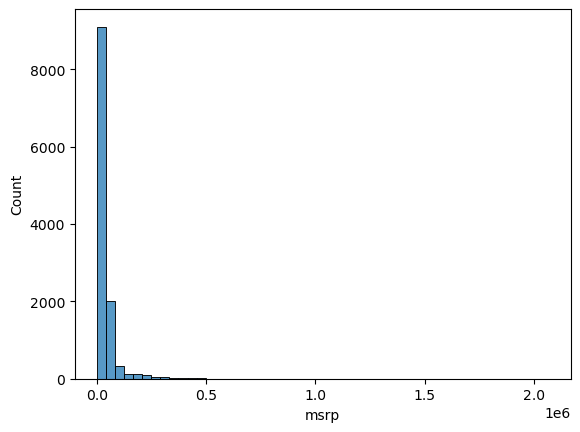

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(car_df['msrp'], bins=50)
# We have a long-tailed distribution as we have a few cars with very high prices

<Axes: xlabel='msrp', ylabel='Count'>

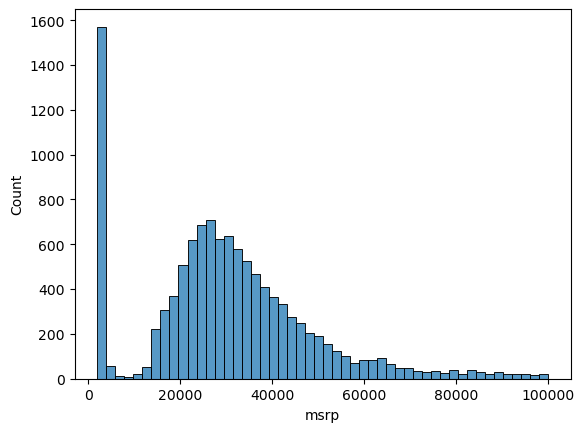

In [18]:
sns.histplot(car_df['msrp'][car_df['msrp'] < 100000], bins=50)
# Most values fall in around this range

<Axes: xlabel='log_msrp', ylabel='Count'>

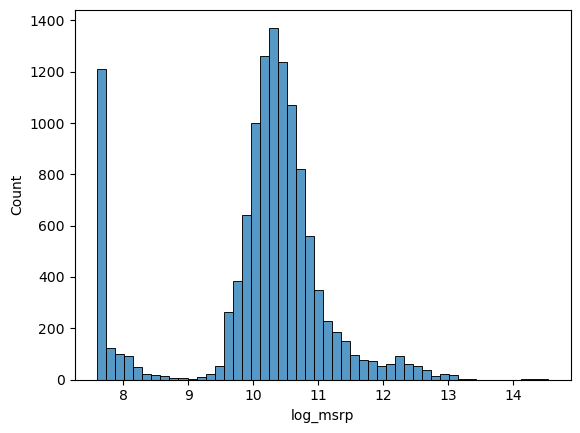

In [19]:
# To normalize the distribution we can use the log transformation
car_df['log_msrp'] = np.log1p(car_df['msrp']) # log1p applies log(1 + x) to avoid log(0)
sns.histplot(car_df['log_msrp'], bins=50)
# Now the distribution is more normal, which is better for machine learning models

In [20]:
car_df.isna().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
log_msrp                0
dtype: int64

### Setting up the Validation Framework

In [21]:
n = len(car_df)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = int(n - n_val - n_test)

n_train, n_val, n_test

(7150, 2382, 2382)

In [40]:
# These values are not shuffled, so we need to shuffle them
idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)

car_df_train = car_df.iloc[idx[:n_train]].reset_index(drop=True)
car_df_val = car_df.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True)
car_df_test = car_df.iloc[idx[n_train+n_val:]].reset_index(drop=True)

In [41]:
y_train = np.log1p(car_df_train.msrp.values)
y_val = np.log1p(car_df_val.msrp.values)
y_test = np.log1p(car_df_test.msrp.values)

del car_df_train['msrp']
del car_df_val['msrp']
del car_df_test['msrp']

In [42]:
car_df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
log_msrp                               13.081075
Name: 10, dtype: object

In [43]:
car_df_train.columns.values

array(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size',
       'vehicle_style', 'highway_mpg', 'city_mpg', 'popularity',
       'log_msrp'], dtype=object)

In [49]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
car_df_train[base].values
X_train = car_df_train[base].fillna(0).values

In [51]:
w0, w = train_linear_regression(X_train, y_train)

In [52]:
y_pred = X_train.dot(w) + w0

<Axes: ylabel='Count'>

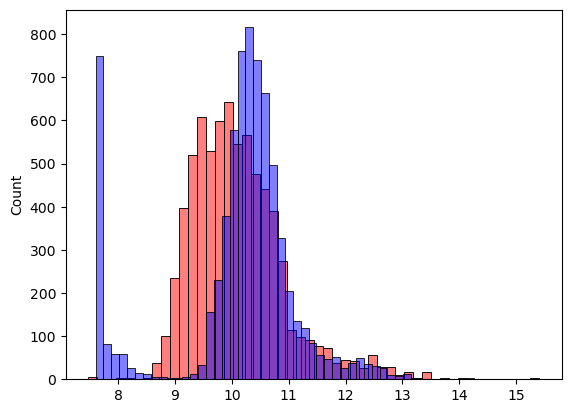

In [57]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

### RMSE

In [59]:
def rmse(y, y_pred):
    rmse = np.sqrt((sum((y_pred - y) ** 2)) / len(y))
    
    return rmse

rmse(y_train, y_pred)

0.7554192603920123

### Validating the Model

In [60]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

In [61]:
X_train = prepare_X(car_df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(car_df_val)
y_pred = X_val.dot(w) + w0

rmse(y_val, y_pred)

0.7616530991301554

### Feature Engineering

In [69]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = df.year.max() - df.year
    features = base + ['age']
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

X_train = prepare_X(car_df_train)

X_train

array([[1.480e+02, 4.000e+00, 3.300e+01, 2.400e+01, 1.385e+03, 9.000e+00],
       [1.320e+02, 4.000e+00, 3.200e+01, 2.500e+01, 2.031e+03, 5.000e+00],
       [1.480e+02, 4.000e+00, 3.700e+01, 2.800e+01, 6.400e+02, 1.000e+00],
       ...,
       [2.850e+02, 6.000e+00, 2.200e+01, 1.700e+01, 5.490e+02, 2.000e+00],
       [5.630e+02, 1.200e+01, 2.100e+01, 1.300e+01, 8.600e+01, 3.000e+00],
       [2.000e+02, 4.000e+00, 3.100e+01, 2.200e+01, 8.730e+02, 0.000e+00]])

In [70]:
X_train = prepare_X(car_df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(car_df_val)
y_pred = X_val.dot(w) + w0

rmse(y_val, y_pred)

0.5172055461058416

<Axes: ylabel='Count'>

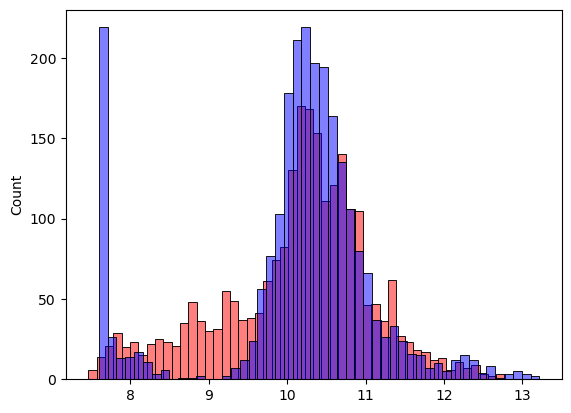

In [72]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_val, color='blue', alpha=0.5, bins=50)

### Categorical Variables

In [79]:
for val in [x for x in range(2,5)]:
    car_df_train['num_doors_'+str(val)] = (car_df_train.number_of_doors == val).astype('int')

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,log_msrp,num_doors_2,num_doors_3,num_doors_4
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,9.575747,1,0,0
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,9.887663,0,0,1
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,9.893235,0,0,1
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,7.601402,0,1,0
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,10.937757,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,10.913287,1,0,0
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,10.282472,1,0,0
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,10.453803,0,0,1
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,12.622481,0,0,1


In [87]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = df.year.max() - df.year
    features.append('age')
    
    for val in [x for x in range(2,5)]:
        df['num_doors_'+str(val)] = (df.number_of_doors == val).astype('int')
        features.append('num_doors_'+str(val))
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

In [88]:
prepare_X(car_df_train)

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [285.,   6.,  22., ...,   0.,   0.,   1.],
       [563.,  12.,  21., ...,   0.,   0.,   1.],
       [200.,   4.,  31., ...,   0.,   0.,   1.]])

In [89]:
X_train = prepare_X(car_df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(car_df_val)
y_pred = X_val.dot(w) + w0

rmse(y_val, y_pred)

0.5157995641502531

In [95]:
car_makes = list(car_df_train.make.value_counts().head().index)

In [99]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = df.year.max() - df.year
    features.append('age')
    
    for val in [x for x in range(2,5)]:
        df['num_doors_'+str(val)] = (df.number_of_doors == val).astype('int')
        features.append('num_doors_'+str(val))
        
    for val in car_makes:
        df['make'+val] = (df.make == val).astype('int')
        features.append('make'+val)
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

In [101]:
X_train = prepare_X(car_df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(car_df_val)
y_pred = X_val.dot(w) + w0

rmse(y_val, y_pred)

0.5076038849557393

In [102]:
car_df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'log_msrp', 'num_doors_2',
       'num_doors_3', 'num_doors_4'],
      dtype='object')

In [105]:
categorical = ['make', 'model', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style']

categories = {}

for c in categorical:
    categories[c] = list(car_df_train[c].value_counts().head().index)
    
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'model': ['silverado_1500', 'tundra', 'f-150', 'sierra_1500', 'tacoma'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'hatchback',
  'luxury,performance'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [109]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = df.year.max() - df.year
    features.append('age')
    
    for val in [x for x in range(2,5)]:
        df['num_doors_'+str(val)] = (df.number_of_doors == val).astype('int')
        features.append('num_doors_'+str(val))
        
    for val in car_makes:
        df['make'+val] = (df.make == val).astype('int')
        features.append('make'+val)
        
    for name, values in categories.items():
        for val in values:
            df[name+'_'+val] = (df[name] == val).astype('int')
            features.append(name+'_'+val)
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

In [112]:
X_train = prepare_X(car_df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(car_df_val)
y_pred = X_val.dot(w) + w0

rmse(y_val, y_pred)

1860.695785049973

In [113]:
w0, w

(5.387876909040149e+16,
 array([ 1.60536928e+01, -1.65392083e+03, -7.76222535e+01, -5.08939755e+01,
         4.46139997e-01,  1.29104280e+01,  1.10976427e+04,  1.22611575e+04,
         1.12707172e+04, -4.40000000e+02,  1.14318524e+18,  1.39923889e+18,
         1.70696755e+18, -9.59136751e+17,  0.00000000e+00, -1.14318524e+18,
        -1.39923889e+18, -1.70696755e+18,  9.59136751e+17,  5.89295525e+01,
        -6.61335592e+02,  1.04151934e+02,  8.60322163e+01,  2.19610411e+02,
        -1.66955974e+03, -1.56552859e+03, -1.54005994e+03, -1.97870598e+03,
        -1.33459322e+03,  1.12415737e+16,  1.12415737e+16,  1.12415737e+16,
         1.12415737e+16,  1.12415737e+16, -6.51203428e+16, -6.51203428e+16,
        -6.51203428e+16, -6.51203428e+16, -2.84045269e+01,  2.04879503e+02,
        -1.42880044e+02,  6.64943538e+01, -1.15928537e+02,  2.19000000e+02,
         2.37000000e+02,  2.06000000e+02, -9.63971162e-02, -1.65377271e-02,
         1.65381720e-01,  3.31158372e-01, -2.13380372e-01]))

### Regularisation

In [124]:
X = [[4, 4, 4],
     [3, 5, 5],
     [5, 1, 1],
     [5, 4, 4],
     [7, 5, 5],
     [4, 5, 5.00000001]]

X = np.array(X)
X

array([[4.        , 4.        , 4.        ],
       [3.        , 5.        , 5.        ],
       [5.        , 1.        , 1.        ],
       [5.        , 4.        , 4.        ],
       [7.        , 5.        , 5.        ],
       [4.        , 5.        , 5.00000001]])

In [125]:
np.linalg.inv(X.T.dot(X))

array([[ 3.85321698e-02,  1.20696657e+05, -1.20696686e+05],
       [ 1.20696640e+05, -2.74658839e+14,  2.74658839e+14],
       [-1.20696680e+05,  2.74658839e+14, -2.74658839e+14]])

In [127]:
y = [1, 2, 3, 1, 2, 3]

XTX = X.T.dot(X) + 0.01 * np.eye(3)
XTX_inv = np.linalg.inv(XTX)
XTX_inv.dot(X.T).dot(y)

array([0.33643484, 0.04007035, 0.04007161])